In [ ]:
!pip install ktrain

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/metin_madenciligi_proje/preprocessed_european_comments_train_10k.csv')

In [ ]:
data_train.head()

,Unnamed: 0,body,Subjectivity,Polarity,Analysis
0,0,"woman claims said insults, bystanders didnt. t...",0.843750,-0.322917,Negative
1,1,turkey doesn't know balkans.,0.000000,0.000000,Neutral
2,2,lot talk turkey,0.000000,0.000000,Neutral
3,3,don't like ruling party turkey. it's turkish p...,0.000000,0.000000,Neutral
4,4,create confusion absolute numbers. ~0.01 popul...,0.423384,-0.020833,Negative


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/metin_madenciligi_proje/preprocessed_european_comments_test_2k.csv')

In [ ]:
data_test.head()

,Unnamed: 0,body,Subjectivity,Polarity,Analysis
0,56819,like daniel hannan. believe extremely wrong he...,0.336198,-0.077344,Negative
1,56820,eu charity - escaping war - shelter new life w...,0.405303,0.392424,Positive
2,56821,i've understood argument turkey europe (which ...,0.387500,-0.018750,Negative
3,56822,wrong. reason turkey didn't join 80m muslim co...,0.497778,0.040000,Positive
4,56823,"turkish people free europe, turkish people lot...",0.766667,0.400000,Positive


In [ ]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                 text_column = 'body',
                 label_columns = 'Analysis',
                 val_df = data_test,
                 maxlen = 400,
                 ngram_range=2,
                 preprocess_mode = 'bert')

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
X_train[0].shape

(10014, 400)

In [ ]:
model = text.text_classifier(name='bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
# Get learning rate.
learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test, y_test),
                            batch_size = 6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1669/1669 [==============================] - 1344s 796ms/step - loss: 1.1121 - accuracy: 0.4627
Epoch 2/10
1669/1669 [==============================] - 1326s 795ms/step - loss: 0.9000 - accuracy: 0.5566
Epoch 3/10
1669/1669 [==============================] - 1322s 792ms/step - loss: 0.6512 - accuracy: 0.7270
Epoch 4/10
1669/1669 [==============================] - 1322s 792ms/step - loss: 0.4134 - accuracy: 0.8391
Epoch 5/10
1669/1669 [==============================] - 1320s 791ms/step - loss: 0.8774 - accuracy: 0.5946
Epoch 6/10
1669/1669 [==============================] - 1317s 789ms/step - loss: 1.2458 - accuracy: 0.3963
Epoch 7/10
1669/1669 [==============================] - 61s 36ms/step - loss: 1.7545 - accuracy: 0.3370


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


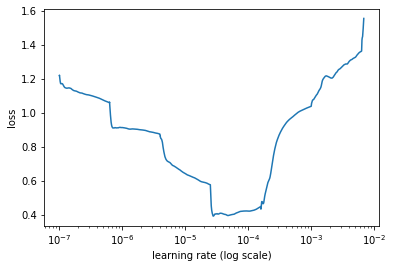

In [ ]:
# get optimal learning rate.
#learner.lr_find(start_lr=1e-07, max_epochs=10)
#learner.lr_plot()

In [ ]:
history = learner.fit_onecycle(lr = 2e-5, epochs = 3) #2e-5, 1e-4




begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1669/1669 [==============================] - 1418s 842ms/step - loss: 0.8930 - accuracy: 0.5550 - val_loss: 0.5094 - val_accuracy: 0.8004
Epoch 2/3
1669/1669 [==============================] - 1411s 845ms/step - loss: 0.4227 - accuracy: 0.8360 - val_loss: 0.3088 - val_accuracy: 0.8872
Epoch 3/3
1669/1669 [==============================] - 1408s 844ms/step - loss: 0.1779 - accuracy: 0.9396 - val_loss: 0.3483 - val_accuracy: 0.8838


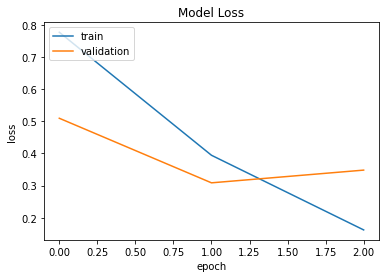

In [ ]:
learner.plot('loss')

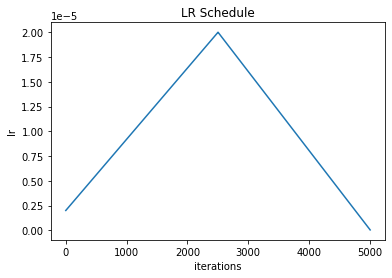

In [ ]:
learner.plot('lr')

In [ ]:
learner.validate()

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       616
           1       0.93      0.88      0.90       434
           2       0.90      0.91      0.90      1059

    accuracy                           0.88      2109
   macro avg       0.89      0.88      0.88      2109
weighted avg       0.88      0.88      0.88      2109



array([[517,  16,  83],
       [ 25, 381,  28],
       [ 79,  14, 966]])